<a href="https://colab.research.google.com/github/UmaGhildiyal/Deep_Neural_Networks_YT/blob/main/15_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align= 'center' >Transfer learning</h1>


Use of pre trained model and customize/re-train it for your needs



> Transfer learning is the improvement of learning in a new task through the transfer of knowledge from a related task that has already been learned

Feature vectors genrated


In [1]:
# Install tensorflow_hub using pip install tensorflow_hub first

In [7]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Make predictions using ready made model (without any training)

In [8]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

# cache_dir indicates where to download data ---> . which means current directory
# untar true will unzip it


In [9]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [10]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

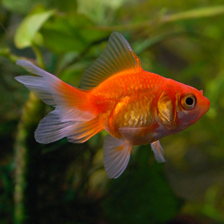

In [11]:
from PIL import Image
import requests
url = 'https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/18_transfer_learning/goldfish.jpg?raw=true'
gold_fish = Image.open(requests.get(url, stream=True).raw).resize(IMAGE_SHAPE)
gold_fish

# Scaling

In [12]:
gold_fish = np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [13]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [14]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 1s/step


(1, 1001)

In [15]:
result

array([[ 0.22101423,  2.0474901 ,  9.62256   , ..., -1.4621569 ,
        -0.2814654 , -0.2598486 ]], dtype=float32)

In [16]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [17]:
!wget https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/18_transfer_learning/ImageNetLabels.txt

--2024-06-28 06:41:02--  https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/18_transfer_learning/ImageNetLabels.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10484 (10K) [text/plain]
Saving to: ‘ImageNetLabels.txt.2’

ImageNetLabels.txt. 100%[===================>]  10.24K  --.-KB/s    in 0s      

2024-06-28 06:41:02 (86.8 MB/s) - ‘ImageNetLabels.txt.2’ saved [10484/10484]



In [18]:
with open("/content/ImageNetLabels.txt", "r") as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [19]:
image_labels[predicted_label_index]

'goldfish'

# Flowers dataset

In [20]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. '.' means current directory
# untar true will unzip

In [21]:
data_dir

'./datasets/flower_photos'

Str path to windows path

In [22]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [23]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/5231103167_a03280e9f6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3742168238_d961937e68_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8036594516_69a7da5f73_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3412874275_ca78ee024d_m.jpg'),
 PosixPath('datasets/flower_photos/roses/16666836810_216f50e9c3_m.jpg')]

In [24]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [25]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5231103167_a03280e9f6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3742168238_d961937e68_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8036594516_69a7da5f73_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3412874275_ca78ee024d_m.jpg'),
 PosixPath('datasets/flower_photos/roses/16666836810_216f50e9c3_m.jpg')]

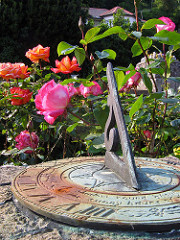

In [26]:
Image.open(str(roses[18]))

In [27]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [28]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [29]:
str(flowers_images_dict['tulips'][0])

'datasets/flower_photos/tulips/142235017_07816937c6.jpg'

In [30]:
img = cv2.imread(str(flowers_images_dict['tulips'][0]))
img.shape

(375, 500, 3)

# Resize images

In [31]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [32]:
X = np.array(X)
y = np.array(y)

# Train Test slipt

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Preprocessing: scale images

In [34]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

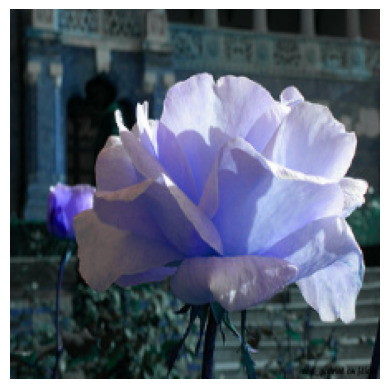

In [35]:
plt.axis('off')
plt.imshow(X[0])

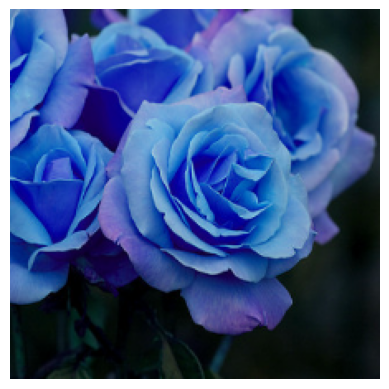

In [36]:
plt.axis('off')
plt.imshow(X[1])

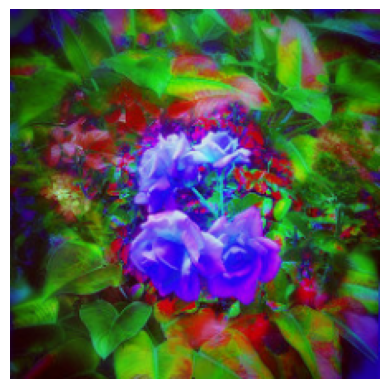

In [37]:
plt.axis('off')
plt.imshow(X[2])

In [38]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 1s/step


array([795, 795, 722])

In [39]:
image_labels[795]

'shower curtain'

In [40]:
image_labels[795]

'shower curtain'

In [41]:
image_labels[722]

'pillow'

# Now take pre-trained model and retrain it using flowers images

In [42]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [43]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

In [ ]:
model.evaluate(X_test_scaled,y_test)